<a href="https://colab.research.google.com/github/EnterTheBeginning/Machine-Learning/blob/master/HW1_Problem5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
plt.rcParams['figure.figsize'] = (8,5)



## Importing dataset


In [2]:
from keras.datasets import mnist

(train_images_original, train_labels_original), (test_images_original, test_labels_original) = mnist.load_data()

Using TensorFlow backend.


##Normalize the data and Flattening

In [0]:
X_train = train_images_original.reshape((60000, 28 * 28))
X_train = X_train.astype('float32') / 255
y_train= train_labels_original
X_test = test_images_original.reshape((10000, 28 * 28))
X_test = X_test.astype('float32') / 255
y_test= test_labels_original


In [4]:
X_train.shape

(60000, 784)

In [5]:
X_test.shape

(10000, 784)

In [0]:
from keras.utils import to_categorical

y_train = to_categorical(train_labels_original)
y_test = to_categorical(test_labels_original)

##  Number of white regions



1.   Round the grey values of the images to 1
2.   Add as an additional feature the number of white regions



###1.   Round the grey values of the images to 1


In [0]:
class Region: 
  
  #class constructor
	def __init__(self, xaxis, yaxis, region): 
		self.xaxis = xaxis 
		self.yaxis = yaxis 
		self.region = region
  #Scanning the region
	def Scan(self, i, j, visited): 
		return (i >= 0 and i < self.xaxis and
				j >= 0 and j < self.yaxis and
				not visited[i][j] and self.region[i][j])

	def DFS(self, i, j, visited): 

		#  cell 
		rowNbr = [-1, -1, -1, 0, 0, 1, 1, 1]; 
		colNbr = [-1, 0, 1, -1, 1, -1, 0, 1]; 
		
		visited[i][j] = True
		for k in range(8): 
			if self.Scan(i + rowNbr[k], j + colNbr[k], visited): 
				self.DFS(i + rowNbr[k], j + colNbr[k], visited) 
	def countIslands(self): 
		visited = [[False for j in range(self.yaxis)]for i in range(self.xaxis)] 
		count = 0
		for i in range(self.xaxis): 
			for j in range(self.yaxis): 
				if visited[i][j] == False and self.region[i][j] ==1: 
					self.DFS(i, j, visited) 
					count += 1
		return count 


Number :0, White region :2


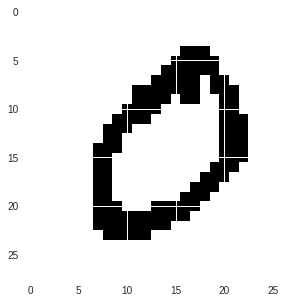

In [63]:
X_train_images = np.array(X_train.reshape((60000,28,28))<0.5)
numOfRegions = Region(28, 28, X_train_images[1])
plt.imshow(X_train_images[1], cmap="gray")
print("Number :{}, White region :{}".format(train_labels_original[1],numOfRegions.countIslands()))


In [96]:
regionNum = [Region(28, 28, x).countIslands() for x in X_train_images[:2000]]
normalizedregionNum = (np.array(regionNum)/3.).reshape((2000,1))
X_train_NewFeat = np.hstack((X_train[:2000],normalizedregionNum))
X_train_NewFeat.shape

X_test_images = np.array(X_test.reshape((10000,28,28))<0.5)
regionNum1 = [Region(28, 28, x).countIslands() for x in X_test_images[:2000]]
normalizedregionNum = (np.array(regionNum1)/3.).reshape((2000,1))
X_test_NewFeat = np.hstack((X_test[:2000],normalizedregionNum))
X_test_NewFeat.shape

(2000, 785)

##Keras 

In [0]:
from keras import layers, models

In [0]:
model = models.Sequential()

In [0]:
model.add(layers.InputLayer(input_shape=(newFeature.shape[1],)))


In [0]:
model.add(layers.Dense(10,activation='softmax'))

In [0]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [71]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 10)                7860      
Total params: 7,860
Trainable params: 7,860
Non-trainable params: 0
_________________________________________________________________


In [102]:
result = model.fit(newFeature, y_train[:2000], epochs=10, batch_size=3)

Epoch 1/10
2000/2000 [==============================] - 1s 345us/step - loss: 0.0472 - acc: 0.9910
Epoch 2/10
2000/2000 [==============================] - 1s 337us/step - loss: 0.0490 - acc: 0.9890
Epoch 3/10
2000/2000 [==============================] - 1s 359us/step - loss: 0.0521 - acc: 0.9890
Epoch 4/10
2000/2000 [==============================] - 1s 357us/step - loss: 0.0558 - acc: 0.9895
Epoch 5/10
2000/2000 [==============================] - 1s 337us/step - loss: 0.0558 - acc: 0.9885
Epoch 6/10
2000/2000 [==============================] - 1s 333us/step - loss: 0.0585 - acc: 0.9880
Epoch 7/10
2000/2000 [==============================] - 1s 336us/step - loss: 0.0600 - acc: 0.9875
Epoch 8/10
2000/2000 [==============================] - 1s 342us/step - loss: 0.0607 - acc: 0.9870
Epoch 9/10
2000/2000 [==============================] - 1s 337us/step - loss: 0.0638 - acc: 0.9880
Epoch 10/10
2000/2000 [==============================] - 1s 340us/step - loss: 0.0631 - acc: 0.9890


Clear Improvement in the Accuracy

In [105]:
score = model.evaluate(X_test_NewFeat,y_test[:2000],verbose =0)
print('Test Loss:', score[0])
print('Test:' , score[1])

Test Loss: 0.9671060664057731
Test: 0.8335


In [108]:
predicted_classes = model.predict_classes(X_test_NewFeat)
correct_indices = np.nonzero(predicted_classes == test_labels_original)[0]
incorrect_indices = np.nonzero(predicted_classes != test_labels_original)[0]



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: elementwise != comparison failed; this will raise an error in the future.
  This is separate from the ipykernel package so we can avoid doing imports until


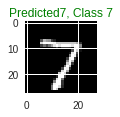

In [109]:
plt.figure()
for i, correct in enumerate(incorrect_indices[:9]):
  plt.subplot(3,3,i+1)
  plt.subplots_adjust(hspace = 0.4, wspace = 0.1)

  plt.imshow(X_test[correct].reshape(28,28) , cmap ='gray', interpolation ='none')
  plt.title("Predicted{}, Class {}".format(predicted_classes[correct],test_labels_original[correct]),color = 'green')
